# Laboratorio 7
## Clasificación de malware con DL

---

Creado por:

* Juan Fernando De Leon Quezada

In [1]:
# Librerias

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import tensorflow 
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPooling2D

from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
from sklearn import metrics

import seaborn as sns

In [2]:
# Import images
img_path = './malimg_paper_dataset_imgs'

#### 1. En el preprocesamiento debe mostrar cuantos ejemplares hay por cada familia. En base a estos datos debe determinar si considera pertinente prescindir de ejemplares que tengan pocas observaciones.

---

Podemos ver las clases que han sido reconocidas.

In [3]:
# Generate batches
batches = ImageDataGenerator().flow_from_directory(directory=img_path, target_size=(64,64), batch_size=10000)

# Show all classes
batches.class_indices

Found 9339 images belonging to 25 classes.


{'Adialer.C': 0,
 'Agent.FYI': 1,
 'Allaple.A': 2,
 'Allaple.L': 3,
 'Alueron.gen!J': 4,
 'Autorun.K': 5,
 'C2LOP.P': 6,
 'C2LOP.gen!g': 7,
 'Dialplatform.B': 8,
 'Dontovo.A': 9,
 'Fakerean': 10,
 'Instantaccess': 11,
 'Lolyda.AA1': 12,
 'Lolyda.AA2': 13,
 'Lolyda.AA3': 14,
 'Lolyda.AT': 15,
 'Malex.gen!J': 16,
 'Obfuscator.AD': 17,
 'Rbot!gen': 18,
 'Skintrim.N': 19,
 'Swizzor.gen!E': 20,
 'Swizzor.gen!I': 21,
 'VB.AT': 22,
 'Wintrim.BX': 23,
 'Yuner.A': 24}

Hay varios métodos disponibles para tratar con datos desequilibrados. Mas adelante utilizaremos un metodo para darle un mayor peso a las clases que cuentan con menos datos.

In [4]:
imgs, labels = next(batches)

#### 2. Plotee las imágenes de los ejemplares de malware.

---

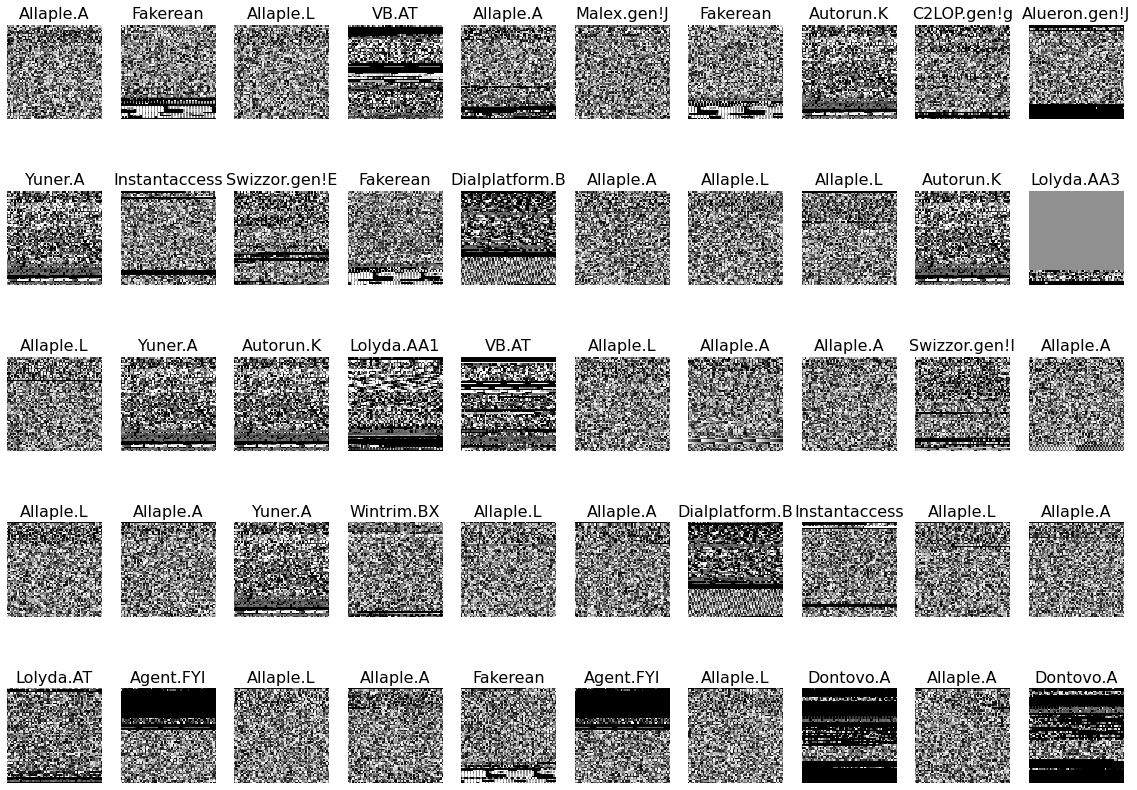

In [5]:
# plots images with labels

figsize=(20,30)
rows=10
interp=False

if type(imgs[0]) is np.ndarray:
    imgs = np.array(imgs).astype(np.uint8)
    if (imgs.shape[-1] != 3):
        imgs = imgs.transpose((0,2,3,1))

f = plt.figure(figsize=figsize)
cols = 10

for i in range(0,50):
    sp = f.add_subplot(rows, cols, i+1)
    sp.axis('Off')
    if labels is not None:
        sp.set_title(list(batches.class_indices.keys())[np.argmax(labels[i])], fontsize=16)
    plt.imshow(imgs[i], interpolation=None if interp else 'none')

#### 3. Utilizando Keras y Tensorflow construya una red neuronal con las capas, funciones de activación y el optimizador que considere conveniente.

---

In [6]:
classes = batches.class_indices.keys()
perc = (sum(labels)/labels.shape[0])*100

Entrenamiento y Pruebas

In [7]:
# 25 classes as output
num_classes = 25

# Build Model
cnn = Sequential()
cnn.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(64,64,3)))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Conv2D(16, (3, 3), activation='relu'))
cnn.add(MaxPooling2D(pool_size=(2, 2)))
cnn.add(Dropout(0.25))
cnn.add(Flatten())
cnn.add(Dense(128, activation='relu'))
cnn.add(Dropout(0.5))
cnn.add(Dense(50, activation='relu'))
cnn.add(Dense(num_classes, activation='softmax'))
cnn.compile(loss='categorical_crossentropy', optimizer = 'adam', metrics=['accuracy'])

#### 4. Muestre el resumen del modelo.

---

In [8]:
cnn.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 31, 31, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 29, 29, 16)        4624      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 14, 14, 16)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 12, 12, 16)        2320      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 6, 6, 16)         0

#### 5. Divida el dataset en un 70% entrenamiento y un 30% de pruebas.

---

In [9]:
# Entrenamiento 70% pruebas 30%
X_train, X_test, y_train, y_test = train_test_split(imgs/255.,labels, test_size=0.3)

y_train_new = np.argmax(y_train, axis=1)

In [10]:
# We balance de data
class_weights = class_weight.compute_class_weight('balanced', np.unique(y_train_new), y_train_new)

c:\Users\jfdel\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass classes=[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24], y=[23 12 13 ... 17  3 15] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


#### 6. Entrene el modelo con el número de épocas que considere conveniente.

---

In [11]:
# We train the CNN
cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=25)

Epoch 1/25
205/205 [==============================] - 11s 52ms/step - loss: 2.0600 - accuracy: 0.4057 - val_loss: 1.1969 - val_accuracy: 0.5571
Epoch 2/25
205/205 [==============================] - 10s 51ms/step - loss: 1.0650 - accuracy: 0.6073 - val_loss: 0.7273 - val_accuracy: 0.7502
Epoch 3/25
205/205 [==============================] - 11s 53ms/step - loss: 0.7706 - accuracy: 0.7161 - val_loss: 0.5289 - val_accuracy: 0.8433
Epoch 4/25
205/205 [==============================] - 11s 55ms/step - loss: 0.6249 - accuracy: 0.7903 - val_loss: 0.3914 - val_accuracy: 0.8936
Epoch 5/25
205/205 [==============================] - 11s 52ms/step - loss: 0.4815 - accuracy: 0.8501 - val_loss: 0.3106 - val_accuracy: 0.9090
Epoch 6/25
205/205 [==============================] - 11s 53ms/step - loss: 0.3849 - accuracy: 0.8788 - val_loss: 0.2569 - val_accuracy: 0.9247
Epoch 7/25
205/205 [==============================] - 11s 55ms/step - loss: 0.3026 - accuracy: 0.9039 - val_loss: 0.2067 - val_accuracy:

#### 7. Muestre las métricas de su modelo.

---

In [12]:
# We avaluate the model
scores = cnn.evaluate(X_test, y_test)

88/88 [==============================] - 1s 9ms/step - loss: 0.1211 - accuracy: 0.9675


In [13]:
# Accuracy Final
scores[1]

0.9675232172012329

Vemos un acuracy del 96% lo cual es muy bueno. Se apega mucho a los datos, esperamos no incurrir en overfitting

#### 8. Evalúe el modelo con el dataset de pruebas y muestre las métricas obtenidas. Discuta los
resultados obtenidos.

---

In [14]:
# %tensorboard --logdir logs/fit

y_predict = np.argmax(cnn.predict(X_test), axis=-1)
y_test2 = np.argmax(y_test, axis=1)
c_matrix = metrics.confusion_matrix(y_test2, y_predict)

88/88 [==============================] - 1s 9ms/step


Text(0.5, 42.0, 'Predicted label')

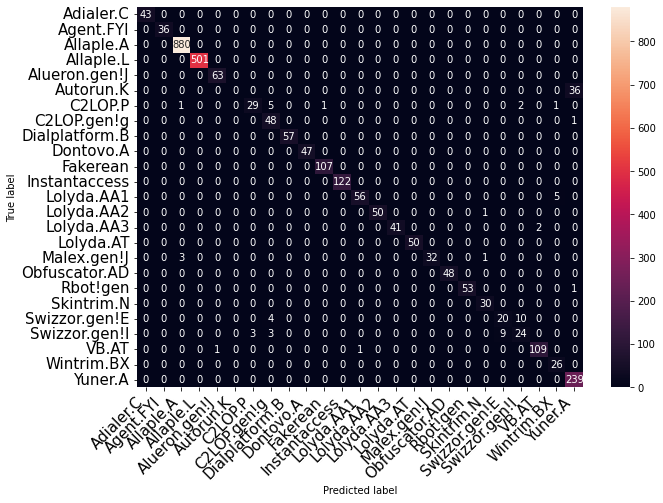

In [15]:
# ConfuSion Matrix 
class_names= batches.class_indices.keys()
figsize = (10,7)
fontsize=15

df_cm = pd.DataFrame(c_matrix, index=class_names, columns=class_names)
fig = plt.figure(figsize=figsize)

try:
    heatmap = sns.heatmap(df_cm, annot=True, fmt="d")
except ValueError:
    raise ValueError("Confusion matrix values must be integers.")

heatmap.yaxis.set_ticklabels(heatmap.yaxis.get_ticklabels(), rotation=0, ha='right', fontsize=fontsize)
heatmap.xaxis.set_ticklabels(heatmap.xaxis.get_ticklabels(), rotation=45, ha='right', fontsize=fontsize)

plt.ylabel('True label')
plt.xlabel('Predicted label')

Podemos concluir que nuestra CNN clasifica de manera correcta el malware. En nuestra matriz se puede apreciar como es que hay datos que no los predice de manera exacta, por ejemplo, Swizzor.gen!l predice como si fuera Swizzor.gen!E, esto puede ser causado por ser parte de la misma familia de malware. Asi mismo sucede con otros, sin embargo, en terminos generales las predicciones fueron acertadas.